# Practice Lab: API keys and Numerical Cleaning

In this lab, you will practice how to request data from a webpage using Python. Specifically, you will practice how to access this data using an API key. You will use the `requests` package to access the data and `pandas` to process it. You will be using APIs to retrieve, clean, and analyze 2022 ride-sharing data from the city of Chicago.

## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer. If needed, you can copy the code and paste it into the cell

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 

</div>

## Table of contents
- [Step 1: Import modules](#import-modules)
- [Step 2: Define environment variables](#environment-variables)
- [Step 3: Extract tables from webpage](#extract-tables)
- [Step 4: Scaling the data](#scaling-the-data)
- [Step 5: Binning the data](#binning-the-data)

<a id="import-modules"></a>

## Step 1: Import modules
First, you need to import the necessary modules.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

<a id="environment-variables"></a>

## Step 2: Define the environment variables 
Retrieve the API key from the environment variables

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Get the API key</li>
            <ul>
                <li>Use <code>load_dotenv()</code> to load the environment variables.</li>
                <li>Use <code>os.getenv()</code> to get the API key, stored in the variable <code>"RIDES_API_KEY"</code> of the environment.</li>
            </ul>
        </ol>
</div>

In [2]:
### START CODE HERE ###

# load the environment variables
load_dotenv()

# load API key from environment variable
API_KEY = os.getenv("RIDES_API_KEY")

### END CODE HERE ###

print(API_KEY)

d34db33f


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 


```
d34db33f
```

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# load the environment variables
load_dotenv()

# load API key from environment variable
API_KEY = os.getenv("RIDES_API_KEY")
```
</details>

<a id="extract-tables"></a>

## Step 3: Extract tables from webpage
Use `requests` to get the data using an API. Use the API key for authentication. Define the parameters for the API request to get multiple pages of data and concatenate those pages into a single DataFrame.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Run the cell below to get the data from the API using a for loop and save it in a DataFame.</li>
        </ol>
</div>

In [3]:
BASE_URL = "https://2eraiuh.dlai.link/api/rides_data"

dataframes = []

for i in range(7):
    # define the parameters for the API request
    params = {
        "api_key": API_KEY,
        "limit": 1000,
        "offset": i * 1000  # 'offset' is sometimes called 'skip'
    }

    # request the data
    response = requests.get(BASE_URL, params=params)

    # convert the response to a DataFrame
    partial_df = pd.DataFrame(response.json()["data"])

    # append the DataFrame to the list
    dataframes.append(partial_df)

# concatenate the DataFrames
df = pd.concat(dataframes)

print(len(df))

6904


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 


```
6904
```

</details>

Next, print out the columns of the dataframe you just created, to familiarize yourself with what you are dealing with.

In [4]:
print(df.columns)

Index(['Additional Charges', 'Fare', 'Tip', 'Trip End Timestamp', 'Trip ID',
       'Trip Miles', 'Trip Seconds', 'Trip Start Timestamp'],
      dtype='object')


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 


```
Index(['Additional Charges', 'Fare', 'Tip', 'Trip End Timestamp', 'Trip ID',
       'Trip Miles', 'Trip Seconds', 'Trip Start Timestamp'],
      dtype='object')
```

</details>

<a id="scaling-the-data"></a>

## Step 4: Scaling the data

You would like to understand how much the customers are paying for the taxi rides. To do that, you can have a look at the `Fare` column, the `Tip` column and the `Additional Charges` column. Adding the three would give you the amount the customers pay for the rides. But is this a fair comparison? Is it fair to compare the cost of a one mile ride with a 20 mile ride? Of course not. In this case it makes much more sense to normalize the fare by the distance, to see how much on average a customer would pay per mile. You can do this in the next cell.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Calculate the price per mile driven for each ride. </li>
            <ul>
                <li>Create a new column <code>Trip Total</code> which is a sum of <code>Fare</code>, <code>Tip</code> and <code>Additional Charges</code>.</li>
                <li>Create a new column <code>Price per Mile</code> which is a ratio between <code>Trip Total</code> and <code>Trip Miles</code>.</li>
            </ul>
        </ol>
</div>

In [5]:
### START CODE HERE ###

# Create a new column `Trip Total`
df["Trip Total"] = df['Fare'] + df["Tip"] + df["Additional Charges"]

# Create a new column `Price per Mile`
df["Price per Mile"] = df["Trip Total"] / df["Trip Miles"]

### END CODE HERE ###

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Create a new column `Trip Total`
df["Trip Total"] = df["Fare"] + df["Tip"] + df["Additional Charges"]

# Create a new column `Price per Mile`
df["Price per Mile"] = df["Trip Total"] / df["Trip Miles"]
```
</details>

Now you can have a look at the distribution of the total prices per mile driven. You can expect these to fluctuate quite a bit, due to different taximeter rates, different amount of tips, different additional charges (maybe one ride was on a toll road, while the other one was not) and maybe some rides are simply more expensive as some time was spent in a traffic jam and a taxi would typically charge for that. Plot a histogram below to have a look.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Plot a histogram of the <code>Price per Mile</code> column using the <code>.hist()</code> method.</li>
            </ul>
        </ol>
</div>

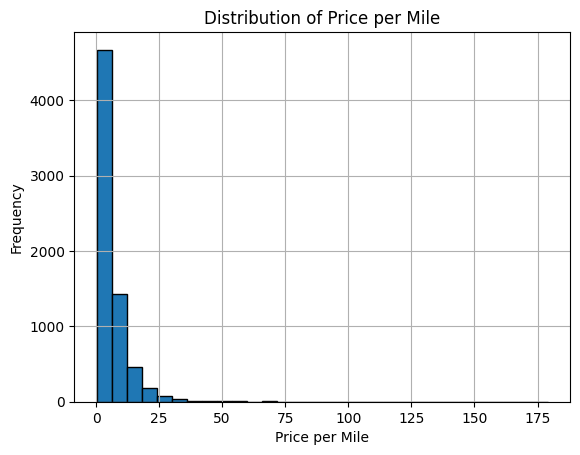

In [6]:
### START CODE HERE ###

# Plot a histogram of the "Price per Mile" column using pandas
df["Price per Mile"].hist(bins=30, edgecolor="k")

### END CODE HERE ###

# Add labels and title
plt.xlabel("Price per Mile")
plt.ylabel("Frequency")
plt.title("Distribution of Price per Mile")


plt.show()

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgsL3/price_per_mile.png" width="350">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python

# Plot a histogram of the 'Price per Mile' column using pandas
df["Price per Mile"].hist(bins=30, edgecolor="k")

```
</details>

This looks interesting. It seems most of the rides cost well below 10 USD per mile driven, but some rides are as expensive as 175 USD per mile. How could that be? And why would anyone pay so much for a taxi ride? Find and inspect the ride with the highest price per mile driven to understand this better.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Find the most expensive ride in the data.</li>
            <ul>
                <li>Use the <code>.max()</code> to find the maximum in the given column.</li>
                <li>Filter the DataFrame using this maximum value.</li>
            </ul>
        </ol>
</div>

In [7]:
### START CODE HERE ###

# Find the maximum value of the 'Price per Mile' column
maximum_price_per_mile = df["Price per Mile"].max()

# Filter the DataFrame to find the ride where the 'Price per Mile' is maximum
max_price_per_mile_ride = df[df["Price per Mile"] == maximum_price_per_mile]

### END CODE HERE ###

max_price_per_mile_ride

,Additional Charges,Fare,Tip,Trip End Timestamp,Trip ID,Trip Miles,Trip Seconds,Trip Start Timestamp,Trip Total,Price per Mile
445,2.91,15.0,0.0,06/17/2022 10:00:00 PM,cf2ccfa5ec67d9351ec83736c0f416885d3827d9,0.1,324.0,06/17/2022 10:00:00 PM,17.91,179.1


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 


<img src="imgsL3/max_price_per_mile.png" width="900">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Find the maximum value of the 'Price per Mile' column
maximum_price_per_mile = df["Price per Mile"].max()

# Filter the dataframe to find the ride where the 'Price per Mile' is maximum
max_price_per_mile_ride = df[df["Price per Mile"] == maximum_price_per_mile]
```
</details>

Now this makes a lot more sense. The price per mile was so high because the trip was so short and the fixed part of the price contributes much more to the total cost than the actual price per mile.

You can run the cell below to actually remove this outlier from the dataset

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Run the cell below to remove the outlier and plot the histogram again. </li>
        </ol>
</div>

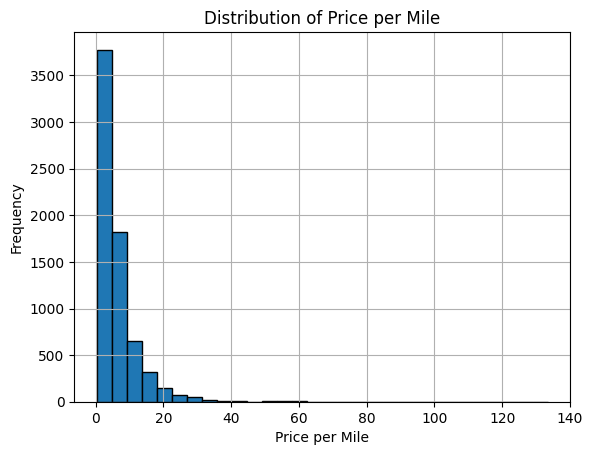

In [8]:
# Filter the DataFrame to exclude outliers (price per mile > 175)
df = df[df["Price per Mile"] < 175]

# Plot a histogram of the filtered DataFrame
df["Price per Mile"].hist(bins=30, edgecolor="k")

# Add labels and title
plt.xlabel("Price per Mile")
plt.ylabel("Frequency")
plt.title("Distribution of Price per Mile")

plt.show()

<a id="binning-the-data"></a>

## Step 5: Binning the data

Taking this into account it would make sense to bin the data according to the length of the trip, to see if longer rides are actually cheaper than shorter ones. Start with plotting a histogram of the trip lengths to see their distribution. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Plot a histogram of the <code>Trip Miles</code> column using <code>.hist()</code> method.</li>
            </ul>
        </ol>
</div>

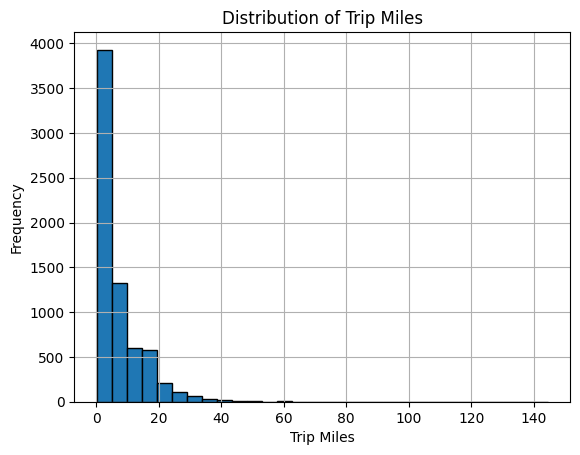

In [9]:
### START CODE HERE ###

# Plot a histogram of the "Trip Miles" column using pandas
df["Trip Miles"].hist(bins=30, edgecolor="k")

### END CODE HERE ###

# Add labels and title
plt.xlabel("Trip Miles")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Miles")

plt.show()

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgsL3/trip_miles.png" width="350">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Plot a histogram of the 'Trip Miles' column using pandas
df["Trip Miles"].hist(bins=30, edgecolor="k")

```
</details>

You can see that the distribution is skewed, with most of the rides being on the shorter side and only a few very long rides. The simplest way to split the data is to equally sized quantiles. In the cell below, you will split the data into five quantiles and label them "very_short", "short", "medium", "long" and "very_long". If you wanted to be more precise with the definition, you could also decide the cutoffs yourself, for example choosing very short rides to be below 1 mile and very long rides to be above 20 miles. But for now you just want to see if your assumption is correct that the short rides are more expensive than the long ones.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the cell below to bin the data into five quantiles. </li>
            <ul>
                <li>Use the <code>.qcut()</code> method to bin the data in the <code>Trip Miles</code> column.</li>
                <li>Create five quantiles and label them <code>"very_short"</code>, <code>"short"</code>, <code>"medium"</code>, <code>"long"</code> and <code>"very_long"</code>. Use the <code>labels</code> list.</li>
            </ul>
        </ol>
</div>

In [11]:
# Create a list with the labels for each bin
labels = ["very_short", "short", "medium", "long", "very_long"]

### START CODE HERE ###

# Create a new column 'Trip Miles Quantiles' with 5 quantiles
df["Trip Miles Quantiles"] = pd.qcut(df["Trip Miles"], q=5, labels=labels)

### END CODE HERE ###

# Get the value counts of the 'Trip Miles Quantiles' column
df["Trip Miles Quantiles"].value_counts()

Trip Miles Quantiles
very_short    1491
very_long     1377
long          1374
medium        1365
short         1283
Name: count, dtype: int64

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

It should be near these values:

```
Trip Miles Quantiles
very_short    1491
very_long     1377
long          1374
medium        1365
short         1283
Name: count, dtype: int64
```

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Create a new column 'Trip Miles Quantiles' with 5 quantiles
df["Trip Miles Quantiles"] = pd.qcut(df["Trip Miles"], q=5, labels=labels)
```
</details>

⚠️The result might seem off because `pd.qcut()` is meant to create equal-sized quartiles. However, in your dataset, many values fall exactly on the quantile boundaries. Since `pandas` can't split tied values across bins, it adjusts the boundaries, resulting in uneven bin sizes.

Now you can use the trip length quantiles to find the the mean price per mile for each of the groups. With the mean price you will create a bar chart showing the results.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the calculated mean price per mile for each of the quantiles and create a bar chart.</li>
            <ul>
                <li>In the <code>.plot()</code> method set <code>type="bar"</code> to create a bar chart.</li>
            </ul>
        </ol>
</div>

In [ ]:
# Get the average "Price per Mile" for each quantile
price_per_quartile_df = df.groupby("Trip Miles Quantiles", observed=True)["Price per Mile"].mean()

### START CODE HERE ###

# Create a bar chart showing the average "Price per Mile" for each quantile
price_per_quartile_df.plot(kind=None, color="skyblue", edgecolor="k")

### END CODE HERE ###

# Set axis label and title
plt.ylabel("Price")
plt.title("Average Price per Mile by Trip Miles Quantile")

plt.show()

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgsL3/avg_price_per_q.png" width=400>

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Create a bar chart showing the average "Price per Mile" for each quantile
price_per_quartile_df.plot(kind="bar", color="skyblue", edgecolor="k")
```
</details>

As you can see the shorter rides indeed have higher price per mile driven. In this lab you have practiced how to use an API using the API key and other parameters to get multiple pages of data. You have then normalized and binned the data to extract some useful insights.

Congratulations for making it until the end of this lab. Hope you enjoyed it! 